In [1]:
#1 TITANIC DATaET CLASSIFICATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
df=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\titanic\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#taking only useful columns and converting category to numeric data for training set
df=df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
df.Sex[df.Sex=='male']=1
df.Sex[df.Sex=='female']=2
df.head()

C:\Users\Niketa Mittal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,2,38.0,1,0,71.2833,1
2,3,3,2,26.0,0,0,7.9250,1
3,4,1,2,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,0


In [3]:
#dividing columns of training set into dependent and independent ones
x=df.iloc[:,0:7]
y=df.iloc[:,7]
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,2,38.0,1,0,71.2833
2,3,3,2,26.0,0,0,7.9250
3,4,1,2,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [4]:
#taking only useful columns and converting category to numeric data for test set
df1=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\titanic\test.csv')
df1=df1[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
df1.Sex[df1.Sex=='male']=1
df1.Sex[df1.Sex=='female']=2
df1.head()

C:\Users\Niketa Mittal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,2,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,2,22.0,1,1,12.2875


In [5]:
#imputing missing values in training set
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=2, weights="uniform")
x_new=pd.DataFrame(imp.fit_transform(x), columns=x.columns)
print(x_new)
pd.isna(x_new).sum()

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
0            1.0     3.0  1.0  22.0    1.0    0.0   7.2500
1            2.0     1.0  2.0  38.0    1.0    0.0  71.2833
2            3.0     3.0  2.0  26.0    0.0    0.0   7.9250
3            4.0     1.0  2.0  35.0    1.0    0.0  53.1000
4            5.0     3.0  1.0  35.0    0.0    0.0   8.0500
..           ...     ...  ...   ...    ...    ...      ...
886        887.0     2.0  1.0  27.0    0.0    0.0  13.0000
887        888.0     1.0  2.0  19.0    0.0    0.0  30.0000
888        889.0     3.0  2.0  29.0    1.0    2.0  23.4500
889        890.0     1.0  1.0  26.0    0.0    0.0  30.0000
890        891.0     3.0  1.0  32.0    0.0    0.0   7.7500

[891 rows x 7 columns]


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [6]:
#imputing missing values in test set
test=pd.DataFrame(imp.fit_transform(df1), columns=df1.columns)
print(test)
pd.isna(test).sum()

     PassengerId  Pclass  Sex    Age  SibSp  Parch      Fare
0          892.0     3.0  1.0  34.50    0.0    0.0    7.8292
1          893.0     3.0  2.0  47.00    1.0    0.0    7.0000
2          894.0     2.0  1.0  62.00    0.0    0.0    9.6875
3          895.0     3.0  1.0  27.00    0.0    0.0    8.6625
4          896.0     3.0  2.0  22.00    1.0    1.0   12.2875
..           ...     ...  ...    ...    ...    ...       ...
413       1305.0     3.0  1.0  33.25    0.0    0.0    8.0500
414       1306.0     1.0  2.0  39.00    0.0    0.0  108.9000
415       1307.0     3.0  1.0  38.50    0.0    0.0    7.2500
416       1308.0     3.0  1.0  33.25    0.0    0.0    8.0500
417       1309.0     3.0  1.0  23.00    1.0    1.0   22.3583

[418 rows x 7 columns]


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [7]:
#decision tree with gini criteria
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(criterion='gini')
cl=cl.fit(x_new,y)
y_pred=cl.predict(test)
y_pred
output=pd.DataFrame({'PassengerId':df1['PassengerId'], 'Survived':y_pred})
output.head()
#output.to_csv('/content/result.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


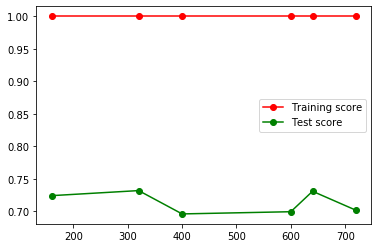

In [8]:
train_sizes, train_scores, test_scores= learning_curve(cl, x_new,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")

In [9]:
#executing ID3 estimator
from id3 import ID3Estimator
from id3 import export_graphviz
estimate=ID3Estimator()
estimate=estimate.fit(x_new,y)
y_pred=estimate.predict(test)
y_pred

ModuleNotFoundError: No module named 'id3'

In [10]:
#getting above error so using entropy criteria as ID3 replacement
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(criterion='entropy')
cl=cl.fit(x_new,y)
y_pred=cl.predict(test)
y_pred
output=pd.DataFrame({'PassengerId':df1['PassengerId'], 'Survived':y_pred})
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


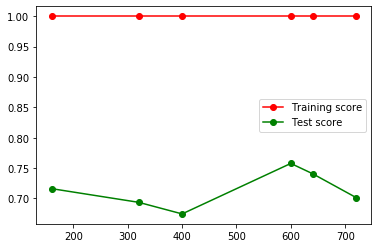

In [11]:
train_sizes, train_scores, test_scores= learning_curve(cl, x_new,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")

In [12]:
#2 CURRENCY NOTE CLASSIFICATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\Niketa Mittal\Downloads\currency.xlsx')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.4621,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0


In [13]:
df.replace(r'^\s*$', np.nan, regex=True)

,variance,skewness,curtosis,entropy,class
0,3.62160,NaN,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.3492,-1.4501,-0.55949,1
1368,-1.38870,-4.8773,6.4774,0.34179,1
1369,-3.75030,-13.4586,NaN,-2.77710,1
1370,-3.56370,-8.3827,12.3930,-1.28230,1


In [14]:
pd.isna(df).sum()
df.info()
df['skewness']=pd.to_numeric(df['skewness'], errors='coerce')
df['curtosis']=pd.to_numeric(df['curtosis'], errors='coerce')
df['entropy']=pd.to_numeric(df['entropy'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   object 
 2   curtosis  1372 non-null   object 
 3   entropy   1372 non-null   object 
 4   class     1372 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 53.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1358 non-null   float64
 2   curtosis  1351 non-null   float64
 3   entropy   1368 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [15]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,NaN,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [16]:
#imputing missing values in data set
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=2, weights="uniform")
x_new=pd.DataFrame(imp.fit_transform(x), columns=x.columns)
print(x_new)

      variance   skewness  curtosis  entropy
0      3.62160   8.648500  -2.80730 -0.44699
1      4.54590   8.167400  -2.45860 -1.46210
2      3.86600  -2.638300   1.92420  0.10645
3      3.45660   9.522800  -4.01120 -3.59440
4      0.32924  -4.455200   4.57180 -0.98880
...        ...        ...       ...      ...
1367   0.40614   1.349200  -1.45010 -0.55949
1368  -1.38870  -4.877300   6.47740  0.34179
1369  -3.75030 -13.458600  17.59235 -2.77710
1370  -3.56370  -8.382700  12.39300 -1.28230
1371  -2.54190  -0.694255   2.68420  1.19520

[1372 rows x 4 columns]


In [17]:
#splitting the data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_new,y, test_size=0.2, random_state=0)


In [18]:
#decision tree with gini criteria
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(criterion='gini')
cl=cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[155   2]
 [  0 118]]
0.9927272727272727


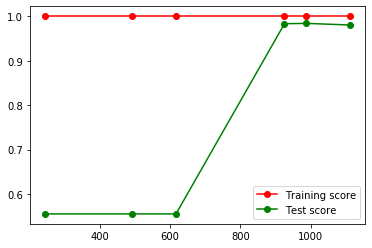

In [20]:
train_sizes, train_scores, test_scores= learning_curve(cl, x_new,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")

In [21]:
#decision tree with entropy criteria
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(criterion='entropy')
cl=cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [22]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[154   3]
 [  1 117]]
0.9854545454545455


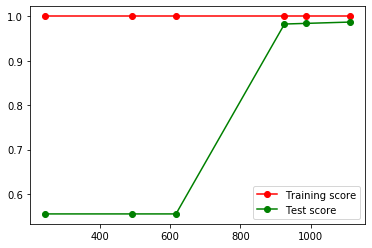

In [23]:
train_sizes, train_scores, test_scores= learning_curve(cl, x_new,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")

In [24]:
#3 PIMA INDIAN WOMEN DIABETES CLASSIFICATION
df=pd.read_excel(r'C:\Users\Niketa Mittal\Downloads\PIMA_Diabetes.xlsx')
df.head()

,pregnancies,glucose,bloodpressure,skinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,,33,1


In [25]:
df.replace(r'^\s*$', np.nan, regex=True)
pd.isna(df).sum()
df.info()
df['glucose']=pd.to_numeric(df['glucose'], errors='coerce')
df['bloodpressure']=pd.to_numeric(df['bloodpressure'], errors='coerce')
df['skinThickness']=pd.to_numeric(df['skinThickness'], errors='coerce')
df['Insulin']=pd.to_numeric(df['Insulin'], errors='coerce')
df['BMI']=pd.to_numeric(df['BMI'], errors='coerce')
df['DiabetesPedigreeFunction']=pd.to_numeric(df['DiabetesPedigreeFunction'], errors='coerce')
df['age']=pd.to_numeric(df['age'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   pregnancies               768 non-null    int64 
 1   glucose                   768 non-null    object
 2   bloodpressure             768 non-null    object
 3   skinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   age                       768 non-null    object
 8   outcome                   768 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 54.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 no

In [26]:
pd.isna(df).sum()

pregnancies                 0
glucose                     6
bloodpressure               2
skinThickness               4
Insulin                     8
BMI                         8
DiabetesPedigreeFunction    6
age                         4
outcome                     0
dtype: int64

In [27]:
#imputing missing values in data set
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=2, weights="uniform")
df=pd.DataFrame(imp.fit_transform(df), columns=df.columns)
pd.isna(df).sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
age                         0
outcome                     0
dtype: int64

In [28]:
df.head()

,pregnancies,glucose,bloodpressure,skinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,109.5,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.741,33.0,1.0


In [29]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]
x.head()

,pregnancies,glucose,bloodpressure,skinThickness,Insulin,BMI,DiabetesPedigreeFunction,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,109.5,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.741,33.0


In [30]:
#KNN Classification
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
cls=cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
y_pred

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [31]:
confusion_matrix(y_test,y_pred)

array([[94, 13],
       [23, 24]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.7662337662337663

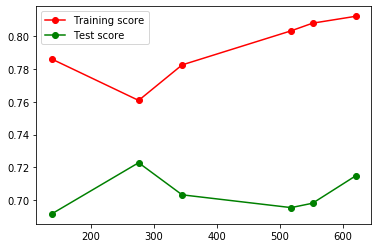

In [33]:
train_sizes, train_scores, test_scores= learning_curve(cls, x,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")

In [34]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [35]:
confusion_matrix(y_test,y_pred)

array([[93, 14],
       [18, 29]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.7922077922077922

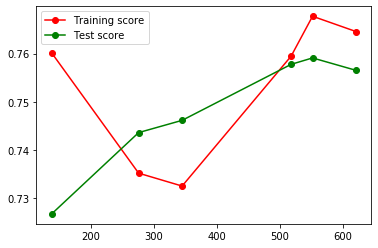

In [37]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores= learning_curve(gnb, x,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")

In [38]:
#4 IRIS DATASET CLASSIFICATION
df=pd.read_csv(r'C:\Users\Niketa Mittal\Downloads\Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [40]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
pd.isna(df).sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [43]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
#KNN Classification
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
cls=KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree')
cls=cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2])

In [45]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  5, 16]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)

0.9

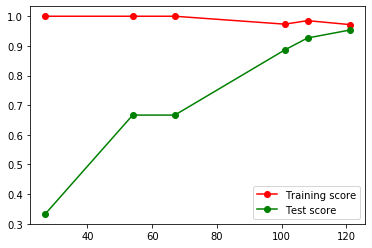

In [47]:
train_sizes, train_scores, test_scores= learning_curve(cls, x,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")

In [48]:
#Naive Bayes Classification
gnb=GaussianNB()
gnb=gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2])

In [49]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 23,  0],
       [ 0,  4, 17]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.9333333333333333

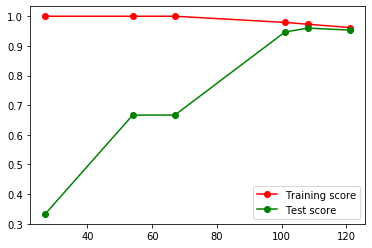

In [51]:
train_sizes, train_scores, test_scores= learning_curve(gnb, x,y, train_sizes=[0.2,0.4,0.5,0.75,0.8,0.9], cv=10)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean,'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")